In [2]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
os.getcwd()

'/home/b08209033/Dycore/exp/Shallow_Water'

In [3]:
file = h5py.File('daily.jld', 'r')
print(file)

<HDF5 file "daily.jld" (mode r)>


In [4]:
for key in file.keys():
    print(key)

h_daily_mean
u_daily_mean
v_daily_mean


In [5]:
u = file["u_daily_mean"]
v = file["v_daily_mean"]
h = file["h_daily_mean"]
print(h)

<HDF5 dataset "h_daily_mean": shape (3, 1, 128, 256), type "<f8">


<HDF5 dataset "u_daily_mean": shape (3, 1, 128, 256), type "<f8">


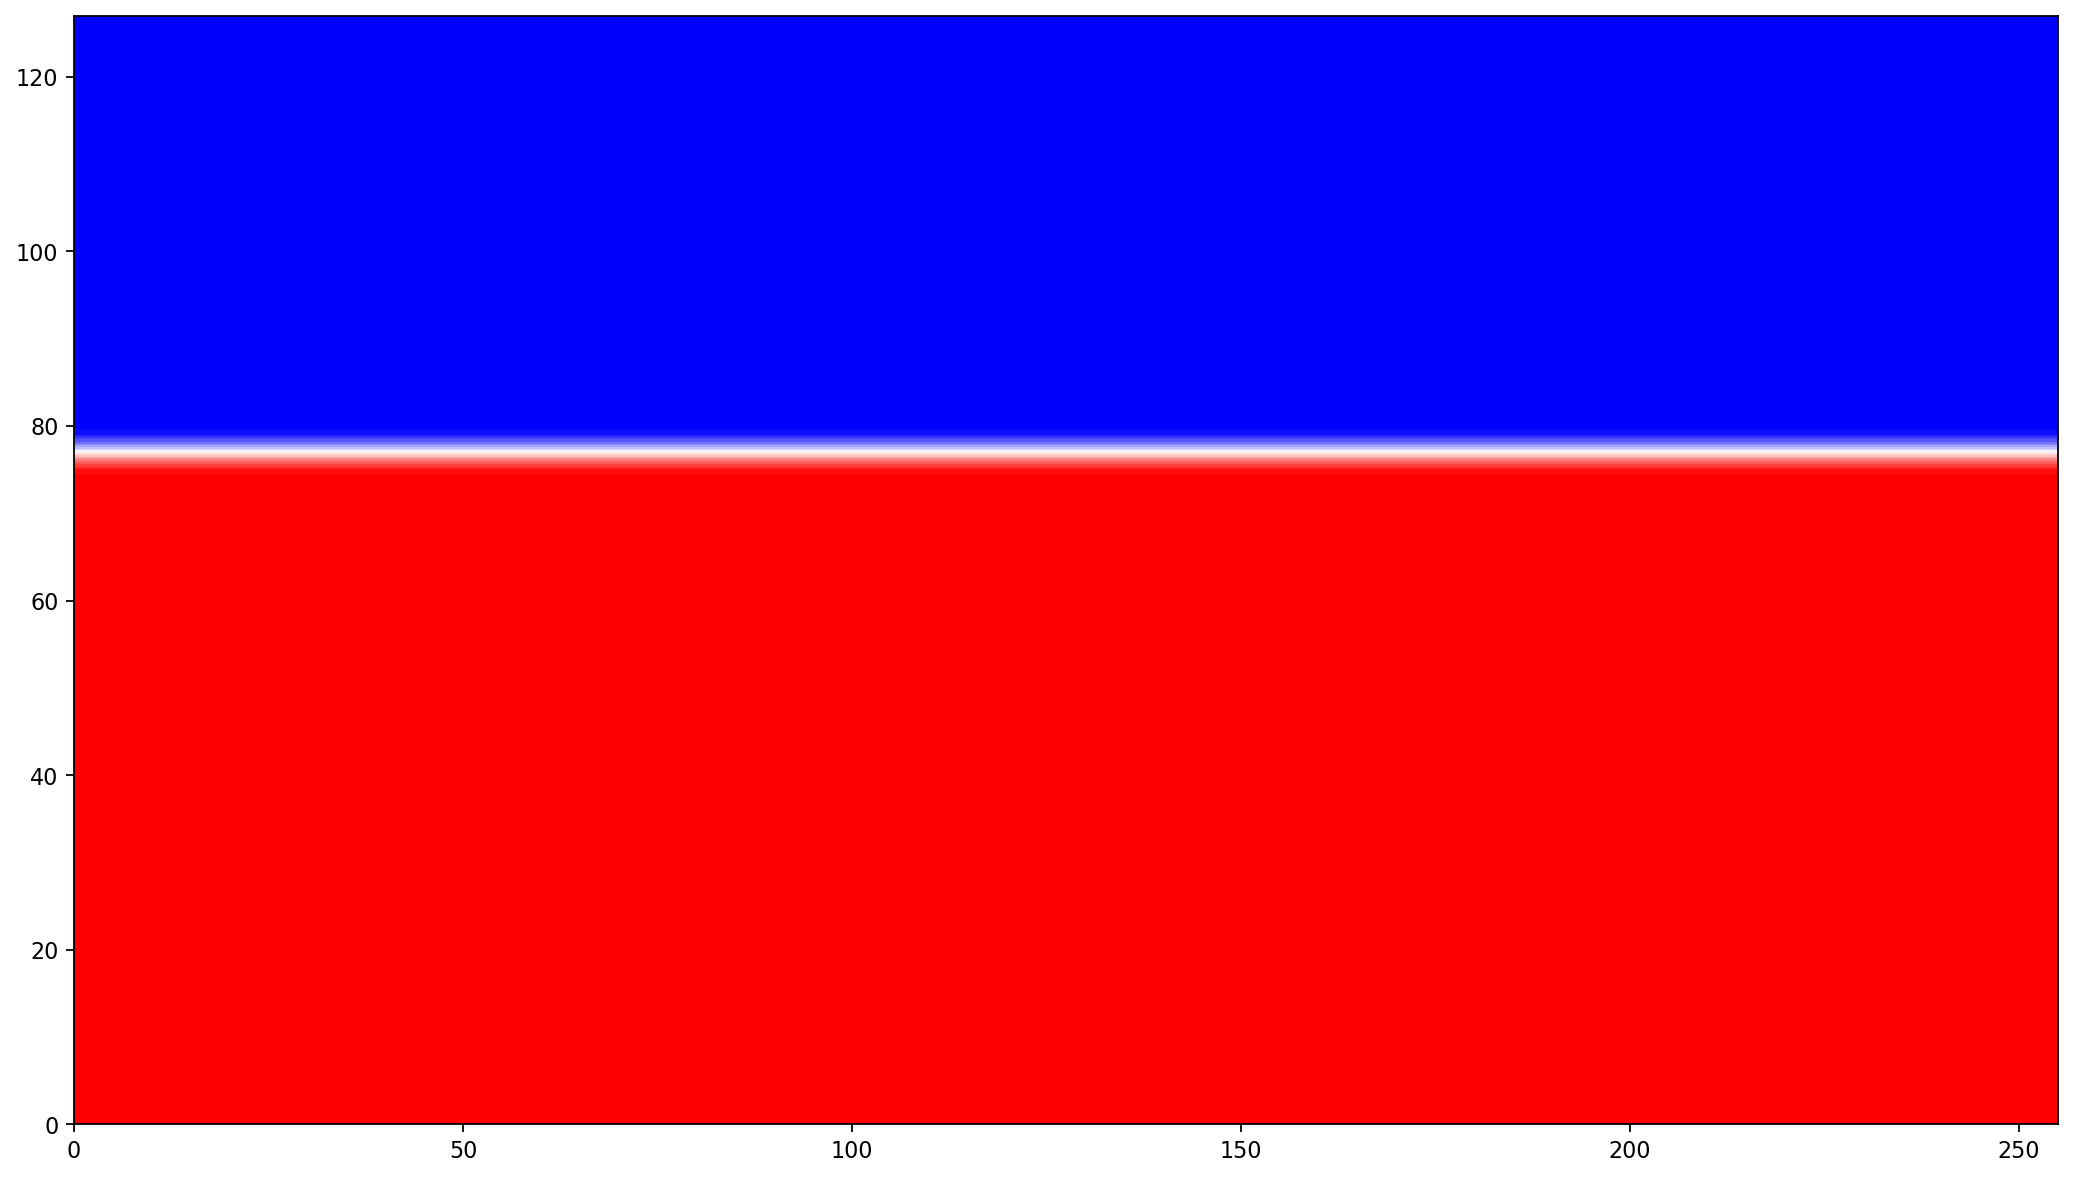

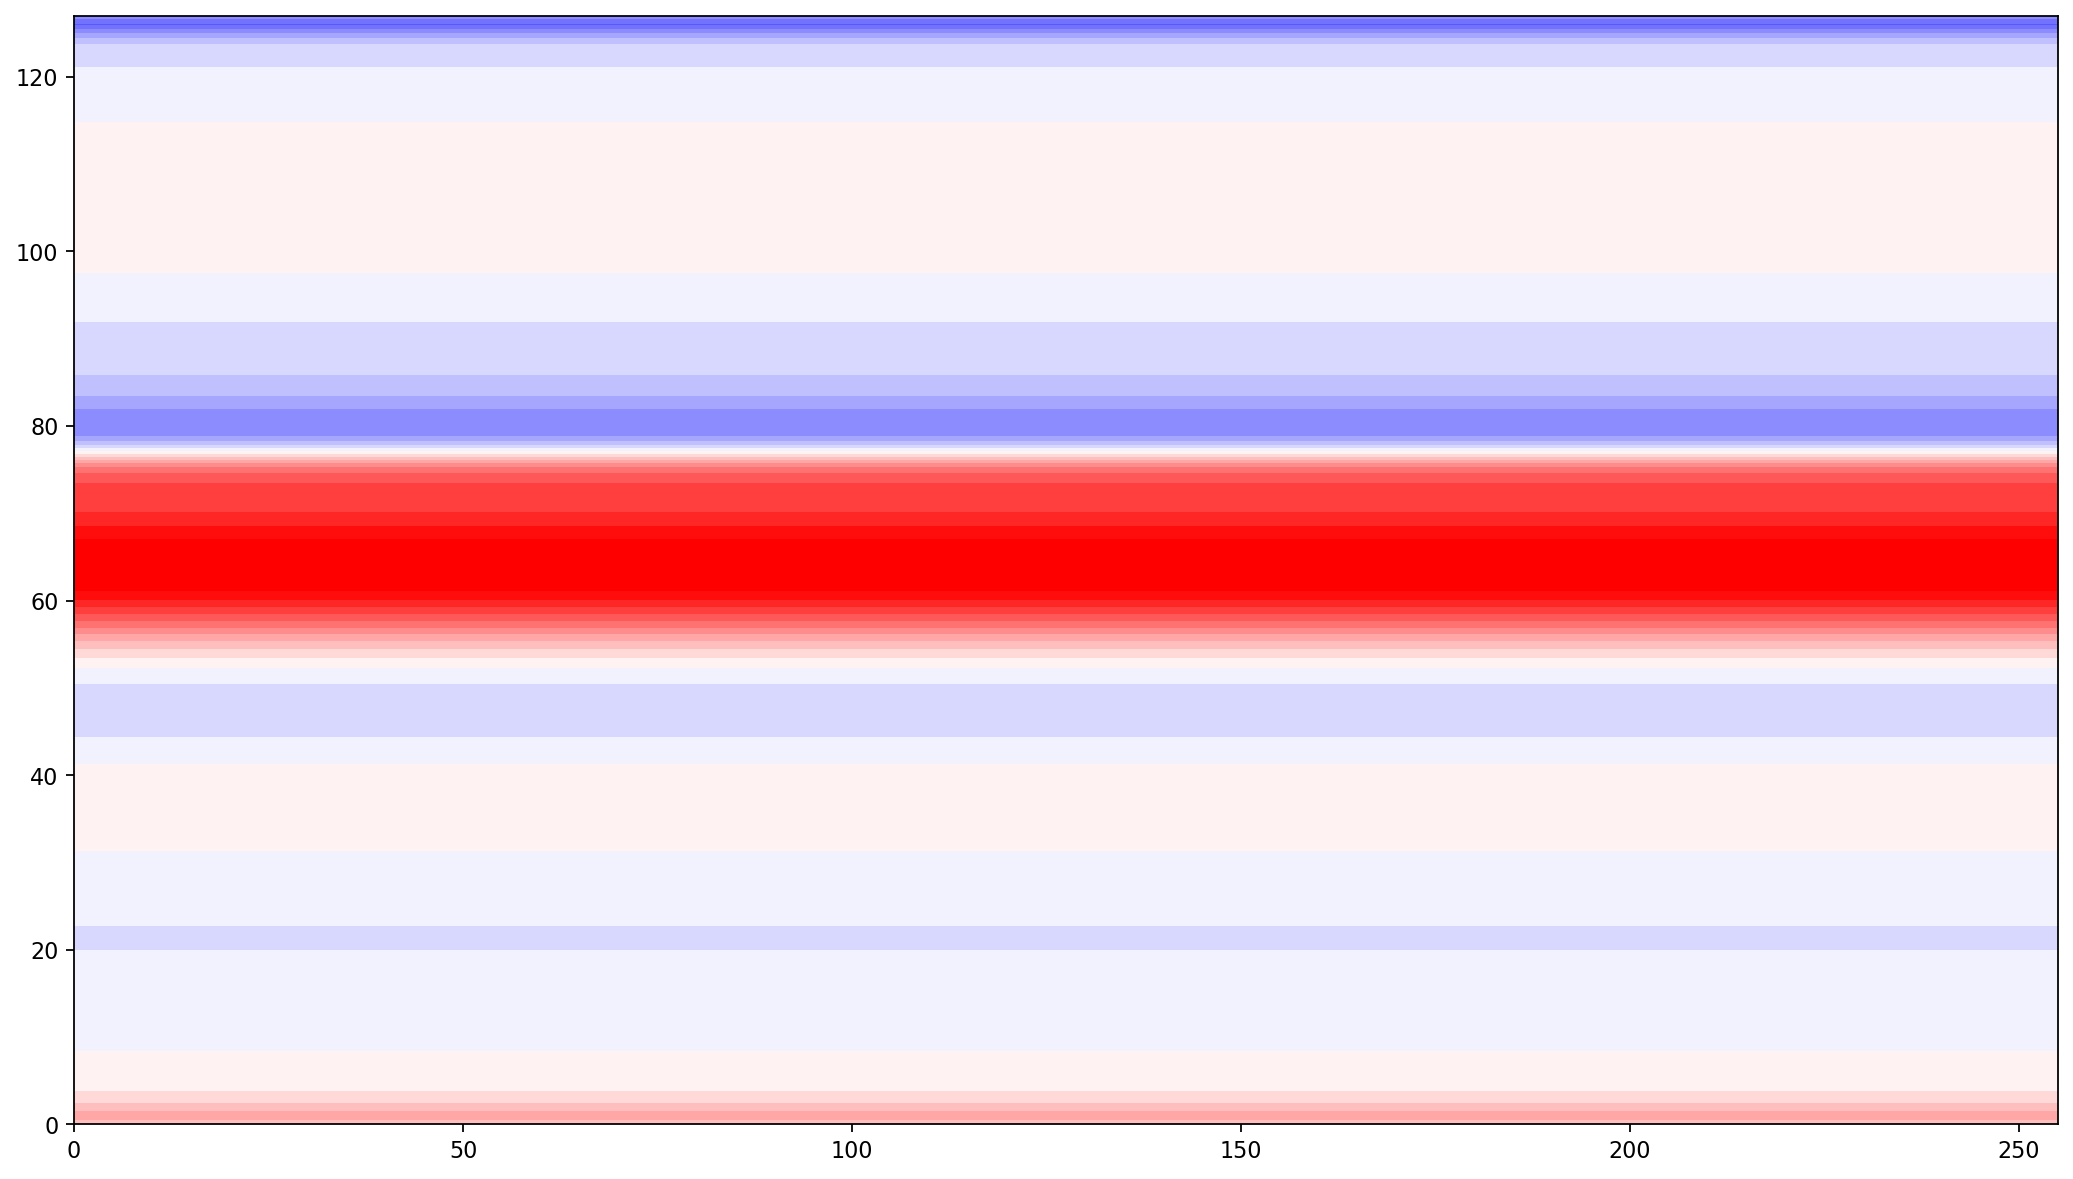

In [6]:
print(u)
plt.figure(figsize = (16,9),
           dpi = 160)
plt.contourf(u[0,-1,:,:], levels = np.linspace(-10,10,21), extend = "both", cmap = "bwr")
plt.show()

plt.figure(figsize = (16,9),
           dpi = 160)
plt.contourf(u[1,-1,:,:], levels = np.linspace(-10,10,21), extend = "both", cmap = "bwr")
plt.show()
#plt.quiver(u[0,-1,:,:][::10,::10],v[0,-1,:,:][::10,::10])

In [23]:
N = 5

diff_matrix_1st = (- np.roll(np.eye(N), 1, axis = 0) + np.roll(np.eye(N), -1, axis = 0))/2
diff_matrix_1st[0, :] = 0
diff_matrix_1st[0, 0] = -1
diff_matrix_1st[0, 1] = 1
diff_matrix_1st[-1, :] = 0
diff_matrix_1st[-1, -2] = -1
diff_matrix_1st[-1, -1] = 1
# diff_matrix_1st /= dy

eigenvalues, eigenvectors = np.linalg.eig(diff_matrix_1st)

In [34]:
print(diff_matrix_1st) 
print(eigenvectors[:,1])
#print(eigenvalues)
print(diff_matrix_1st@eigenvectors[:,1])
print(eigenvalues[1]*eigenvectors[:,1])

[[-1.   1.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0. ]
 [ 0.  -0.5  0.   0.5  0. ]
 [ 0.   0.  -0.5  0.   0.5]
 [ 0.   0.   0.  -1.   1. ]]
[ 4.15710225e-16+0.37796447j  2.67261242e-01+0.37796447j
  5.34522484e-01-0.j          2.67261242e-01-0.37796447j
 -1.61326172e-16-0.37796447j]
[ 2.67261242e-01-8.32667268e-16j  2.67261242e-01-1.88982237e-01j
 -7.49400542e-16-3.77964473e-01j -2.67261242e-01-1.88982237e-01j
 -2.67261242e-01+0.00000000e+00j]
[ 2.67261242e-01-4.82782706e-16j  2.67261242e-01-1.88982237e-01j
 -2.67047626e-16-3.77964473e-01j -2.67261242e-01-1.88982237e-01j
 -2.67261242e-01+3.02906018e-16j]
[ True  True  True  True  True]
